In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas
import os

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [2]:
def zerosToColMedian(nxmNparray):
    '''
    Given nxm matrix, replace every zero
    in each column by that column's median,
    computed without considering that 0-row.
    Replaces in place, but also returns the
    nparray
    '''
    numCols = nxmNparray.shape[1]
    
    # For each column vector, replace
    # all 0s with the median of that vector,
    # calculated without those 0s:
    
    for colIndx in range(numCols):
        colVec = nxmNparray[:,colIndx]
        #np.append(npDataNo0s, colVec[colVec == 0])
        colVecMedian = np.median(colVec[colVec > 0])
        colVec[colVec == 0] = colVecMedian
    return(nxmNparray)

In [3]:
dataPath = os.path.join(os.getenv("HOME"), 
                        'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/slidersByItem.csv')

data = pandas.read_csv(dataPath, sep=',')
npData = np.loadtxt(dataPath,delimiter=',',skiprows=1)
# Replace 0s with their column's median:
npData = zerosToColMedian(npData)


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


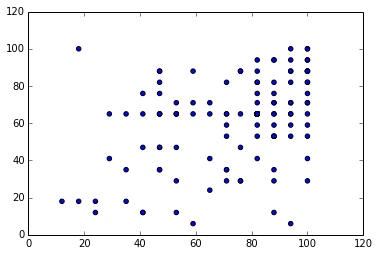

In [4]:
plt.scatter(npData[:,1], npData[:,2])
plt.show()

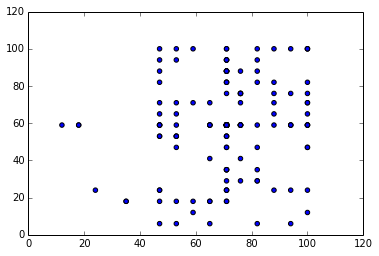

In [5]:
plt.scatter(npData[:,5], npData[:,6])
plt.show()

In [6]:
npData

array([[ 1276242.,       71.,       82., ...,       59.,       82.,
              88.],
       [ 1276245.,       88.,       82., ...,       94.,       88.,
              82.],
       [ 1276247.,       65.,       71., ...,       94.,       76.,
              76.],
       ..., 
       [ 1279965.,      100.,      100., ...,       94.,      100.,
             100.],
       [ 1280544.,       35.,       18., ...,       35.,       24.,
              53.],
       [ 1280847.,       88.,       53., ...,       88.,      100.,
              53.]])

Create info on successively clustering data
into ever larger clusters. Use e.g. the Ward
option, which measures distance between data items
by the difference in their variance (the more similar
the variance the closer they are):
           Feature1   Feature2      Distance   SizeResultingCluster
   array([[  52.     ,   53.     ,    0.04151,    2.     ],
          [  14.     ,   79.     ,    0.05914,    2.     ],
          [  33.     ,   68.     ,    0.07107,    2.     ],
          [  17.     ,   73.     ,    0.07137,    2.     ],
          [   1.     ,    8.     ,    0.07543,    2.     ],
                       ...
          [  62.     ,  152.     ,    0.1726 ,    3.     ],
          [  41.     ,  158.     ,    0.1779 ,    3.     ],
                       ...
          
First line: feature 52 is combined with feature 53 into
a cluster of size 2. Distance in variance between them 
is 0.04151. First cluster of 3: item 62 with 152. The dataset
of this table had data items 0-149. Any 'data item' with a 
number 150 or higher refers to an already formed cluster.
To find items that made up this cluster: 
     theMergeLine = lineGTDataLength - datalength

In [7]:
clusterInfo = linkage(data, 'ward')      # c=85
#clusterInfo = linkage(data, 'centroid') # c=88
#clusterInfo = linkage(data, 'weighted') # c=76
#clusterInfo = linkage(data, 'average')  # c=88
#clusterInfo = linkage(data, 'complete') # c=84
#clusterInfo = linkage(data, 'single')    # c=86

# Cophenet correlation coefficient measures 
# how faithfully a dendrogram preserves pairwise
# distance between the original data points:
(c, coph_dists) = cophenet(clusterInfo, pdist(data))
c

0.8580301475212494

In [8]:
pandas.DataFrame(clusterInfo[:20],columns=['feature1', 'feature2', 'distance', 'clusterSize'])
#pdClusterInfo = pandas.DataFrame(clusterInfo)
#pdClusterInfo[:20]

,feature1,feature2,distance,clusterSize
0,64.0,72.0,49.739320,2.0
1,29.0,30.0,51.662365,2.0
2,89.0,99.0,73.034239,2.0
3,135.0,137.0,76.419893,2.0
4,83.0,108.0,76.713754,2.0
5,85.0,184.0,84.162541,3.0
6,100.0,186.0,90.704649,3.0
7,175.0,176.0,93.605555,2.0
8,18.0,20.0,97.149370,2.0
9,66.0,79.0,97.483332,2.0


In [9]:
conglomerationIndex = 184-len(clusterInfo)
conglomerationIndex

1

In [10]:
#npData[[29,68,62],:]
npData[[72,64],:]
#data.shape

array([[ 1277185. ,       82. ,       65. ,       76. ,       82. ,
              71. ,       59. ,       65. ,       76. ,       71. ,
              65. ,       71. ,       59. ,       65. ,       59. ,
              47. ,       65. ,       53. ,       71. ,       53. ,
              47. ,       76. ,       65. ,       53. ,       59. ,
              41. ,       65. ,       65. ,       59. ,       76. ,
              65. ,       71. ,       79. ,       76. ,       73.5,
              76. ,       76. ,       82. ,       82. ,       53. ],
       [ 1277160. ,       82. ,       65. ,       76. ,       82. ,
              71. ,       59. ,       65. ,       76. ,       71. ,
              65. ,       71. ,       59. ,       65. ,       59. ,
              47. ,       65. ,       53. ,       71. ,       82. ,
              47. ,       76. ,       65. ,       47. ,       53. ,
              71. ,       65. ,       65. ,       59. ,       76. ,
              59. ,       71. ,       79. ,    

In [11]:
npData.shape

(184, 40)

In [12]:
npData[:,1]

array([  71.,   88.,   65.,   41.,   94.,   71.,   88.,   82.,   82.,
         53.,   82.,   18.,  100.,   59.,   82.,   82.,   82.,  100.,
         82.,   82.,   82.,  100.,   53.,   41.,  100.,   82.,   82.,
         82.,   59.,   82.,   82.,   82.,   71.,   82.,   82.,  100.,
         76.,   82.,   82.,   94.,   88.,   82.,   88.,  100.,   82.,
         35.,   82.,   12.,   82.,   47.,   76.,   82.,   94.,   82.,
         82.,   82.,   47.,  100.,   82.,   88.,   82.,   94.,   82.,
         76.,   82.,   82.,   82.,   88.,   47.,  100.,   82.,   29.,
         82.,   59.,   82.,   88.,   47.,   88.,   35.,   82.,   53.,
         82.,   82.,   82.,   82.,   82.,   94.,   82.,   88.,   82.,
         94.,   94.,   24.,   47.,   47.,   71.,   65.,   18.,   76.,
         82.,   82.,   24.,   82.,   82.,   94.,   71.,   65.,   82.,
         82.,   82.,   53.,   53.,   82.,   82.,   82.,   82.,   82.,
         29.,  100.,   88.,   47.,   71.,  100.,   88.,   82.,   88.,
        100.,   41.,

<function matplotlib.pyplot.show>

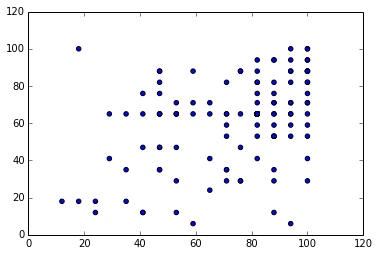

In [13]:
plt.scatter(npData[:,1], npData[:,2])
plt.show

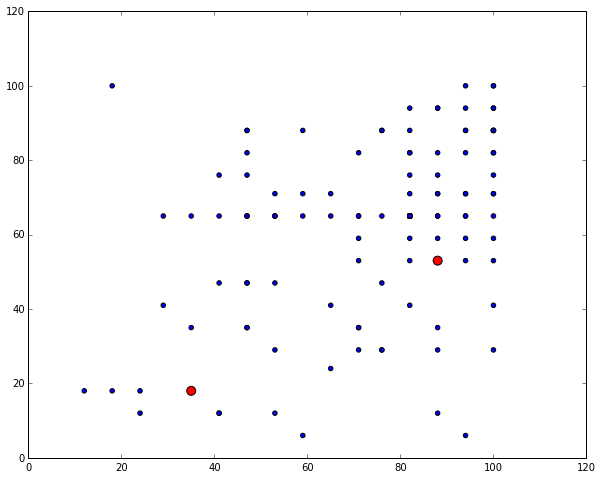

In [14]:
#idxs = [29,68,62]
idxs = [182,183]
plt.figure(figsize=(10, 8))
plt.scatter(npData[:,1], npData[:,2])  # plot all points
plt.scatter(npData[idxs,1], npData[idxs,2], c='r', s=80)  # plot interesting points in red again
plt.show()

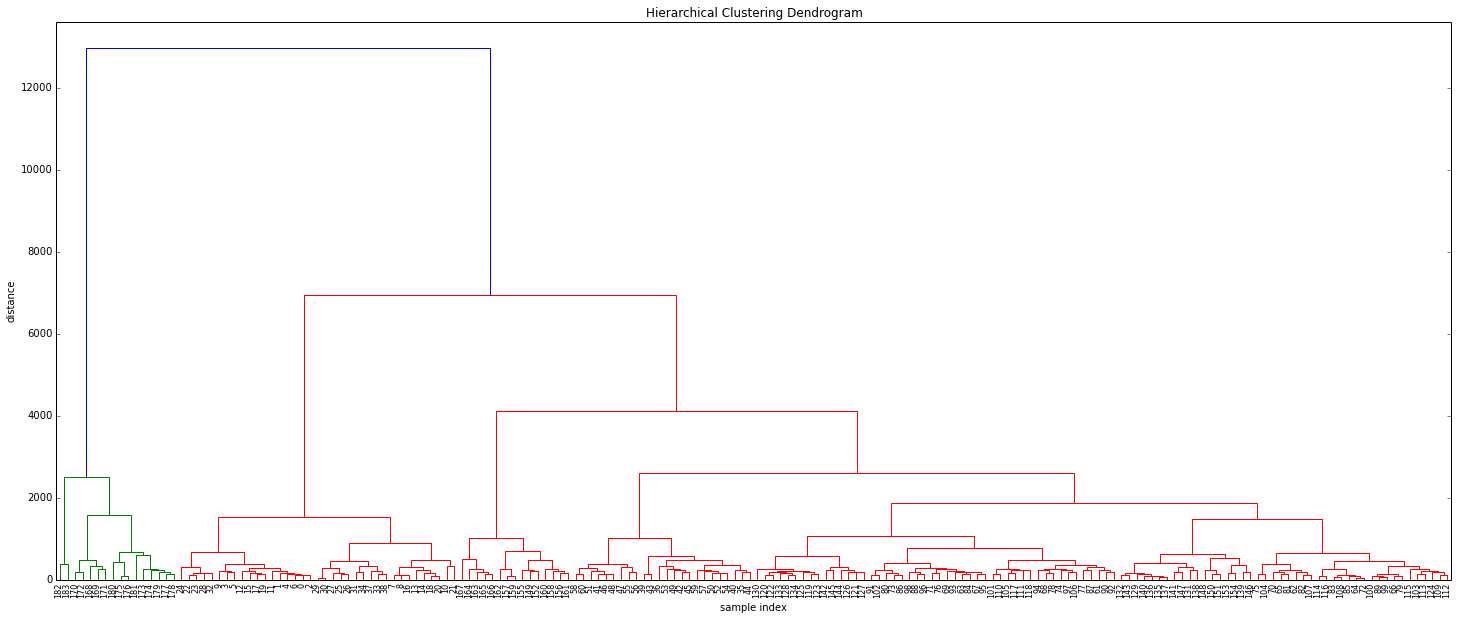

In [15]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    clusterInfo,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()



In [22]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [31]:
# set cut-off to 50
max_d = 2100  # max_d as in max_distance

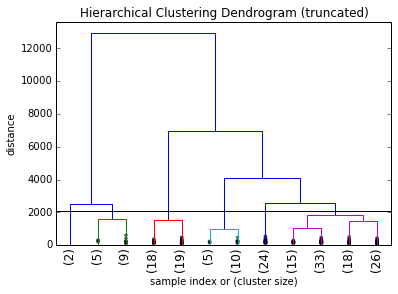

In [33]:
fancy_dendrogram(
    clusterInfo,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=120000, # Make high enough never to get distance labels in chart
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.figure(figsize=(10, 20))
plt.show()

